In [12]:
import pandas as pd

submission=pd.read_csv('C:/Users/PHY/Documents/titainc/submission.csv')
test=pd.read_csv('C:/Users/PHY/Documents/titainc/test.csv')
train=pd.read_csv('C:/Users/PHY/Documents/titainc/train.csv')

In [150]:
import matplotlib.pyplot as plt
import numpy as np

In [131]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [132]:
submission.head()
# 예측 값을 survived 에 입력하에 제출한다. 

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [149]:
test.head()

# test에는 목표 변수 Survived  에 대한 데이터가 없다. 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Test


In [147]:
# train 데이터 프레임의 통계 정보

train.describe()
# 기본적으로 숫자데이터만 정보를 분석해준다. 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [148]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,1
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,Train
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,891
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


<AxesSubplot:>

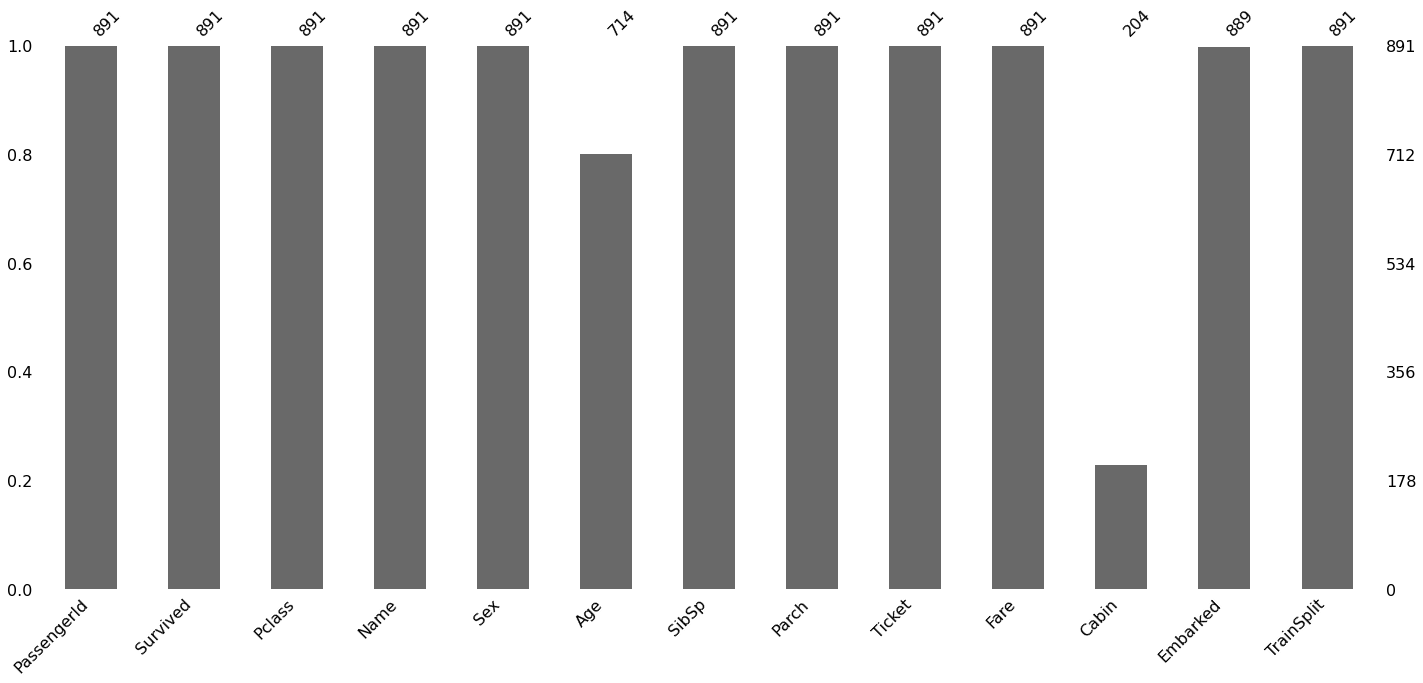

In [146]:
#  결측치 확인

import missingno as msno

msno.bar(train)

<AxesSubplot:>

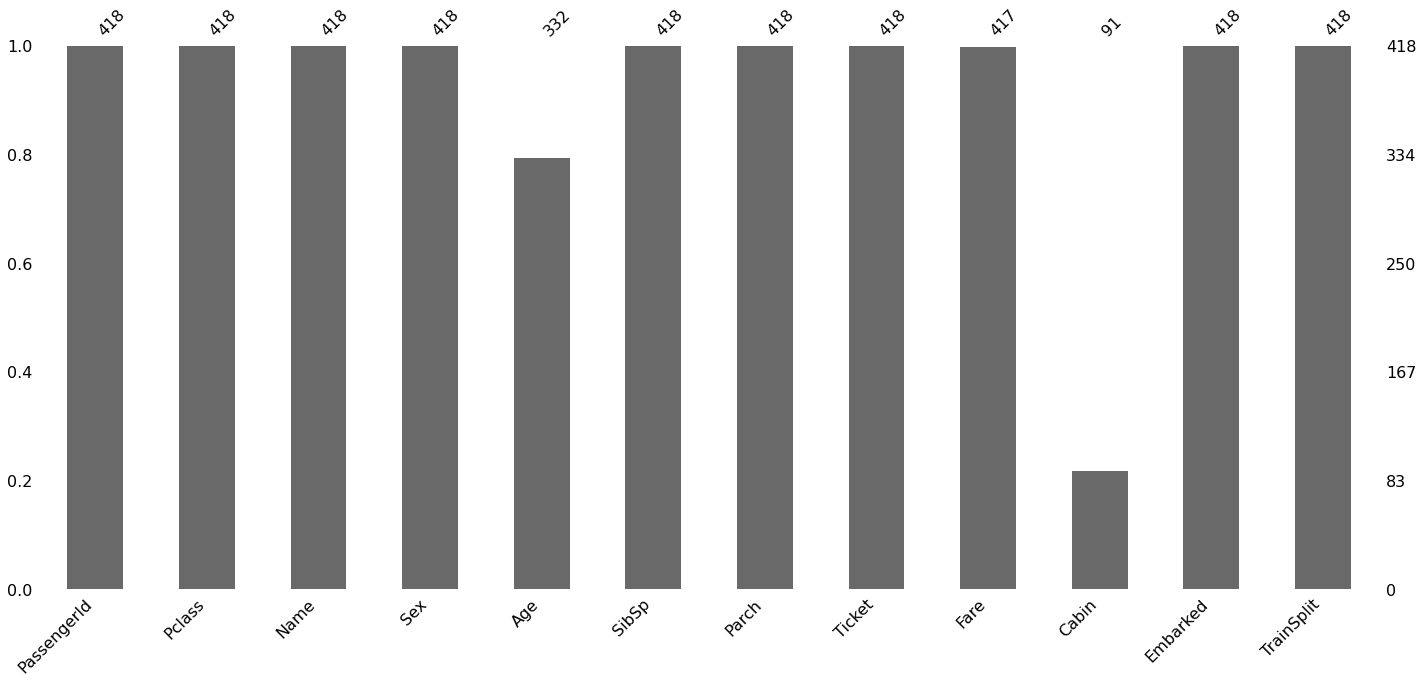

In [141]:
msno.bar(test)

<AxesSubplot:>

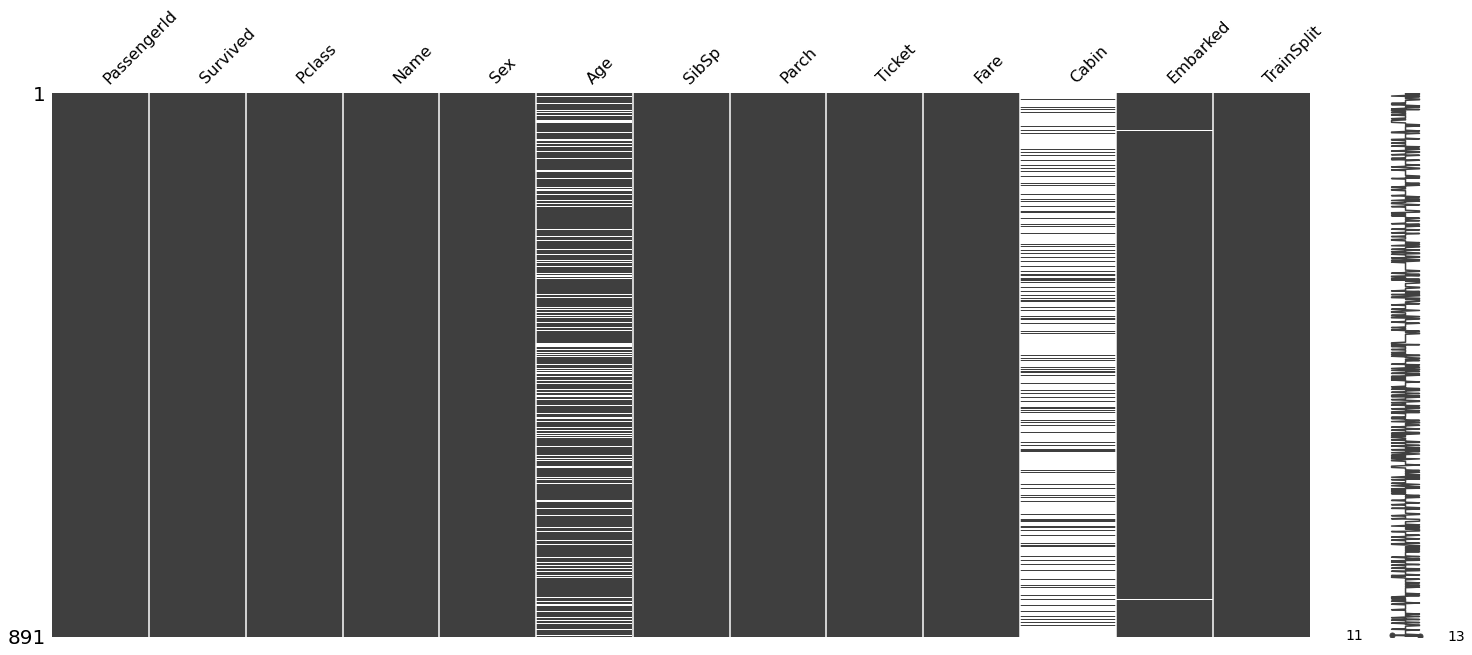

In [142]:
import missingno as msno

msno.matrix(train)

In [137]:
# 상관 관계 분석

train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

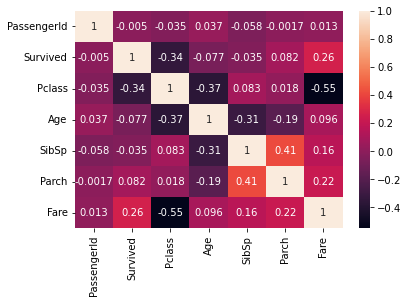

In [144]:
import seaborn as sns

sns.heatmap(train.corr(), annot=True)

# 목표변수 Survived 열과 상관 계수가 높은 피처는 Pclass-34% Fare 26% 이다. 
# 객실등급과 객실 요금이 강한 상관 관계를 보여주고 있다. 

In [145]:
#타이타닉 전체 데이터셋 병합
train["TrainSplit"] = "Train"
test["TrainSplit"] = "Test"

train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Test


In [124]:
data = pd.concat([train, test], axis = 0)
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Test


In [33]:
# 숫자형 피쳐 값들만 추출
data_num = data.loc[:,["Pclass","Age","SibSp","Parch","Fare","Survived"]]
data_num

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0.0
1,1,38.0,1,0,71.2833,1.0
2,3,26.0,0,0,7.9250,1.0
3,1,35.0,1,0,53.1000,1.0
4,3,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,NaN
414,1,39.0,0,0,108.9000,NaN
415,3,38.5,0,0,7.2500,NaN
416,3,NaN,0,0,8.0500,NaN


In [41]:
# 결측값 대체
data_num["Age"] = data_num["Age"].fillna(data_num["Age"].mean())
                                #결측값 채울때 쓰는 법 #결측치를 평균값으로 넣기로함.
data_num["Fare"] = data_num["Fare"].fillna(data_num["Fare"].mode()[0])
                                                            #결측치를 최빈값으로 처리


In [38]:
#학습용 데이터와 검증용 데이터로 구분
X_train = data_num.loc[data["TrainSplit"] == "Train", ["Pclass","Age","SibSp","Parch","Fare"]]
y_train = data_num.loc[data["TrainSplit"] == "Train", "Survived"]

In [42]:
X_test = data_num.loc[data["TrainSplit"] == "Test", ["Pclass","Age","SibSp","Parch","Fare"]]

In [55]:
# 학습 데이터를 훈련용 80% 검증용 20% 분할한다.
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)

In [67]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=22)          
knn.fit(X_tr,y_tr) 
y_knn_pred = knn.predict(X_val)                   

#평가
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_val, y_knn_pred)
knn_acc 

0.7206703910614525

In [125]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Age       1046 non-null   float64
 2   SibSp     1309 non-null   int64  
 3   Parch     1309 non-null   int64  
 4   Fare      1308 non-null   float64
 5   Survived  891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 103.9 KB


In [126]:
data_num.isnull().sum()

Pclass        0
Age         263
SibSp         0
Parch         0
Fare          1
Survived    418
dtype: int64

<AxesSubplot:>

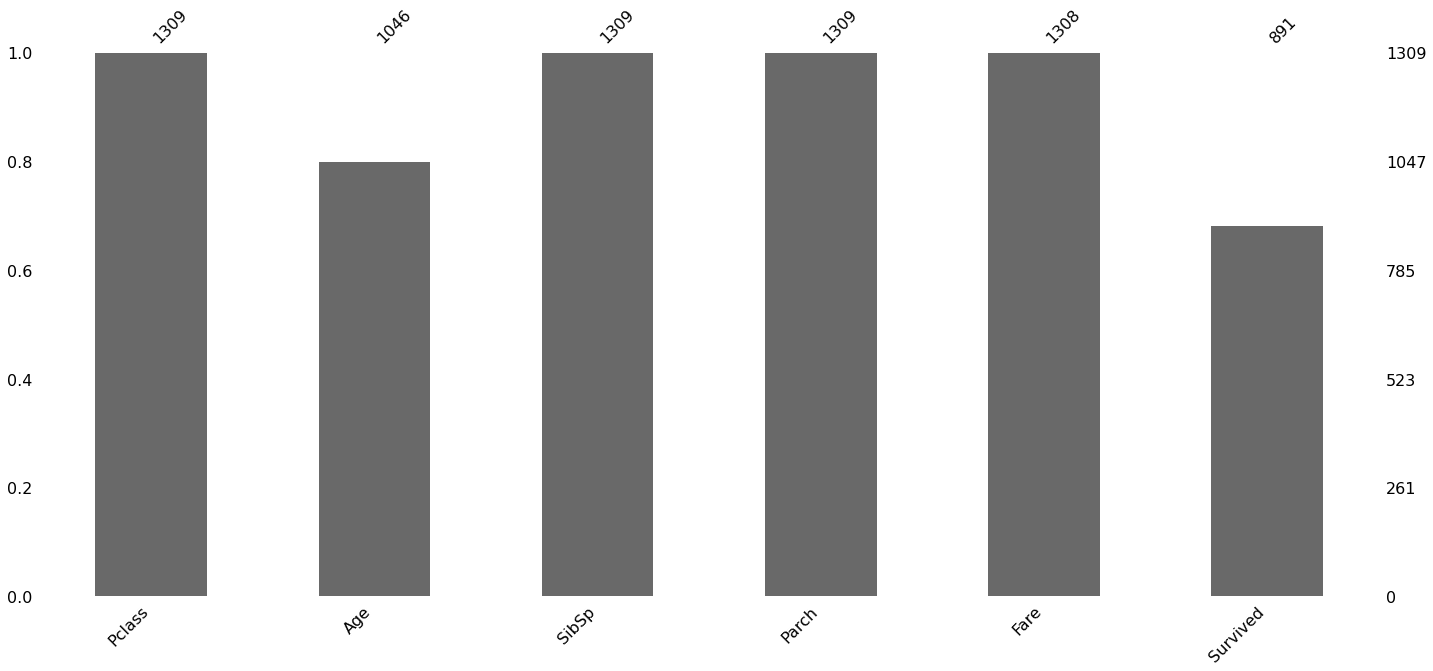

In [143]:
msno.bar(data_num)

In [76]:
data_num = data.loc[:,["Sex","Pclass","Age","SibSp","Parch","Fare","Survived"]]
data_num

,Sex,Pclass,Age,SibSp,Parch,Fare,Survived
0,male,3,22.0,1,0,7.2500,0.0
1,female,1,38.0,1,0,71.2833,1.0
2,female,3,26.0,0,0,7.9250,1.0
3,female,1,35.0,1,0,53.1000,1.0
4,male,3,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
413,male,3,NaN,0,0,8.0500,NaN
414,female,1,39.0,0,0,108.9000,NaN
415,male,3,38.5,0,0,7.2500,NaN
416,male,3,NaN,0,0,8.0500,NaN


In [ ]:
# DT, SVM, KNN, voting, bagging, XGBoost

72
65
74
72
60
70

In [113]:
# 피처 엔지니어링 
# 모델 성능을 개선할 수 있는 여러가지 방법을 적용해 보자. 

train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

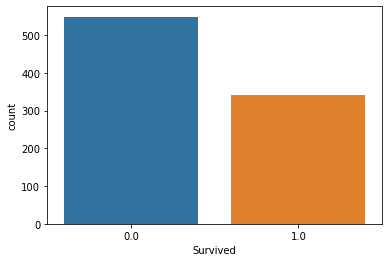

In [114]:
sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

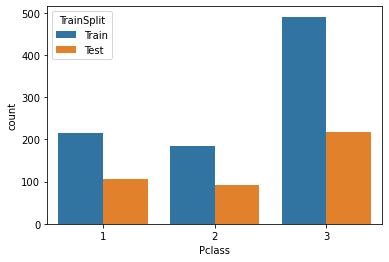

In [91]:
# 객실 등급 pclass

sns.countplot(x='Pclass', hue='TrainSplit', data=data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

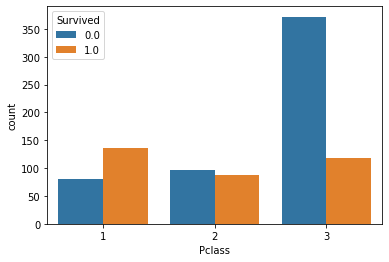

In [92]:
sns.countplot(x='Pclass', hue='Survived', data=data)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

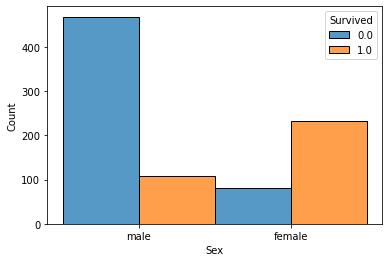

In [89]:
# Sex 성별

sns.histplot(x='Sex', hue='Survived', 
             data=data[data['TrainSplit']=='Train'], multiple='dodge')

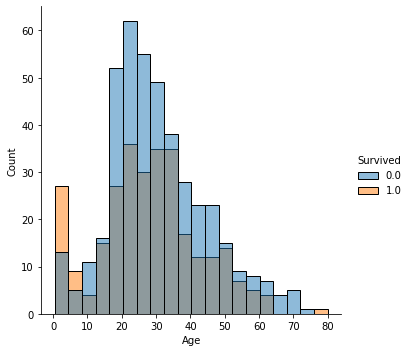

In [90]:
# Age 나이

sns.displot(x='Age', hue='Survived', data=data[data['TrainSplit']=='Train'])

In [86]:
# male female 로 되어있는 성별 데이터를 숫자로 변경한다. 
data_num.loc[data_num['Sex']=='female','Sex'] = 0
data_num.loc[data_num['Sex']=='male','Sex'] = 1
data_num['Sex'] = data_num['Sex'].astype(int)
data_num['Sex'].value_counts()

1    843
0    466
Name: Sex, dtype: int64

In [151]:
data_num.corr()

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.338481
Age,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.077221
SibSp,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.035322
Parch,0.018322,-0.150917,0.373587,1.000000,0.221539,0.081629
Fare,-0.558629,0.178740,0.160238,0.221539,1.000000,0.257307
Survived,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


In [102]:
# 결측값 대체
data_num["Age"] = data_num["Age"].fillna(data_num["Age"].mean())
                                #결측값 채울때 쓰는 법 #결측치를 평균값으로 넣기로함.
data_num["Fare"] = data_num["Fare"].fillna(data_num["Fare"].mode()[0])
                                                            #결측치를 최빈값으로 처리


In [108]:
#학습용 데이터와 검증용 데이터로 구분
X_train = data_num.loc[data["TrainSplit"] == "Train", ['Sex',"Pclass","Age","SibSp","Parch","Fare"]]
y_train = data_num.loc[data["TrainSplit"] == "Train", "Survived"]

In [107]:
X_test = data_num.loc[data["TrainSplit"] == "Test", ['Sex',"Pclass","Age","SibSp","Parch","Fare"]]

In [109]:
# 학습 데이터를 훈련용 80% 검증용 20% 분할한다.
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)

In [112]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=22)          
knn.fit(X_tr,y_tr) 
y_knn_pred = knn.predict(X_val)                   

#평가
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_val, y_knn_pred)
knn_acc 

0.7262569832402235

In [153]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf") # 다른 방식으로 linear, poly 가 있지만 rbf 가 가장 효율적이 형태이다.
svc.fit(X_tr,y_tr) #학습 훈련용 문제와 답
y_svc_pred = svc.predict(X_val) #예측
svc_acc = accuracy_score(y_val,y_svc_pred) #평가
svc_acc

0.6871508379888268

In [156]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, random_state=20)
                            #분기의 개수(ex)if를 얼마나 더 만들것인가와 같은 이야기
dtc.fit(X_tr,y_tr) #학습 훈련용 문제와 답
y_dtc_pred = dtc.predict(X_val) #예측
dtc_acc = accuracy_score(y_val,y_dtc_pred) #평가
dtc_acc

0.8603351955307262

In [159]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

hvc = VotingClassifier(estimators = [("KNN",knn),("SVM",svc),("DT",dtc)],voting="hard" )
                                     #세가지 모델을 지정                 #soft도 가능하지만 hard를 추천한다.

# 학습
hvc.fit(X_tr,y_tr)

# 예측
y_hvc_pred = hvc.predict(X_val)
#평가
hvc_acc = accuracy_score(y_val,y_hvc_pred)
hvc_acc

0.7318435754189944

In [170]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, max_depth=10,random_state=20)

# 학습
rfc.fit(X_tr,y_tr)

# 예측
y_rfc_pred = rfc.predict(X_val)
#평가
rfc_acc = accuracy_score(y_val,y_rfc_pred)
rfc_acc

0.8491620111731844

In [169]:
# 제출용 파일 만들기
# 예측
y_test_pred = dtc.predict(X_test)
# 제출양식
submission["Survived"] = y_test_pred.astype(int)
#제출용 파일 저장
submission.to_csv('C:/Users/PHY/Documents/titainc/submission_02.csv',index=False)